<a href="https://colab.research.google.com/github/Krit-Barnwal/Summer-Ai-Ml/blob/main/Day6_AI_ML_Krit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets,model_selection,metrics,svm
import seaborn as sns
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = datasets.load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
x = data.data
y = data.target
Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(x,y,test_size = 0.3,random_state=5)
svm_model = svm.SVC(kernel="linear", gamma="auto", C=2)

# Training the SVM model
svm_model = svm_model.fit(Xtrain, Ytrain)

# Making predictions on the test set
ypred = svm_model.predict(Xtest)


In [ ]:
report = metrics.classification_report(ypred,Ytest)
prec = metrics.precision_score(ypred,Ytest,average = "macro")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9791666666666666


# Diabetes data


In [ ]:
dab = pd.read_csv("diabetes.csv")
print(dab.shape)
dab.head()
"""
label = outcome
"""


(768, 9)


In [ ]:
x = dab.drop("Outcome",axis = 1,inplace = False) #all the data
y = dab['Outcome'] #labels
Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 5)
diabmodel = svm.SVC(kernel = "poly",gamma = "scale",C=1)
model = diabmodel.fit(Xtrain,Ytrain)
pred = model.predict(Xtest)
cfmatrix = metrics.confusion_matrix(pred,Ytest)
print(cfmatrix)

[[140  29]
 [ 20  42]]


In [ ]:
#perdorm eda on diabetes dataset
#exploratory data analysis
import seaborn as sns
dab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


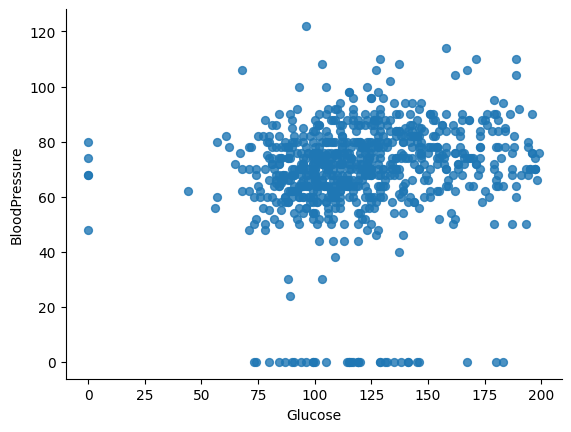

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

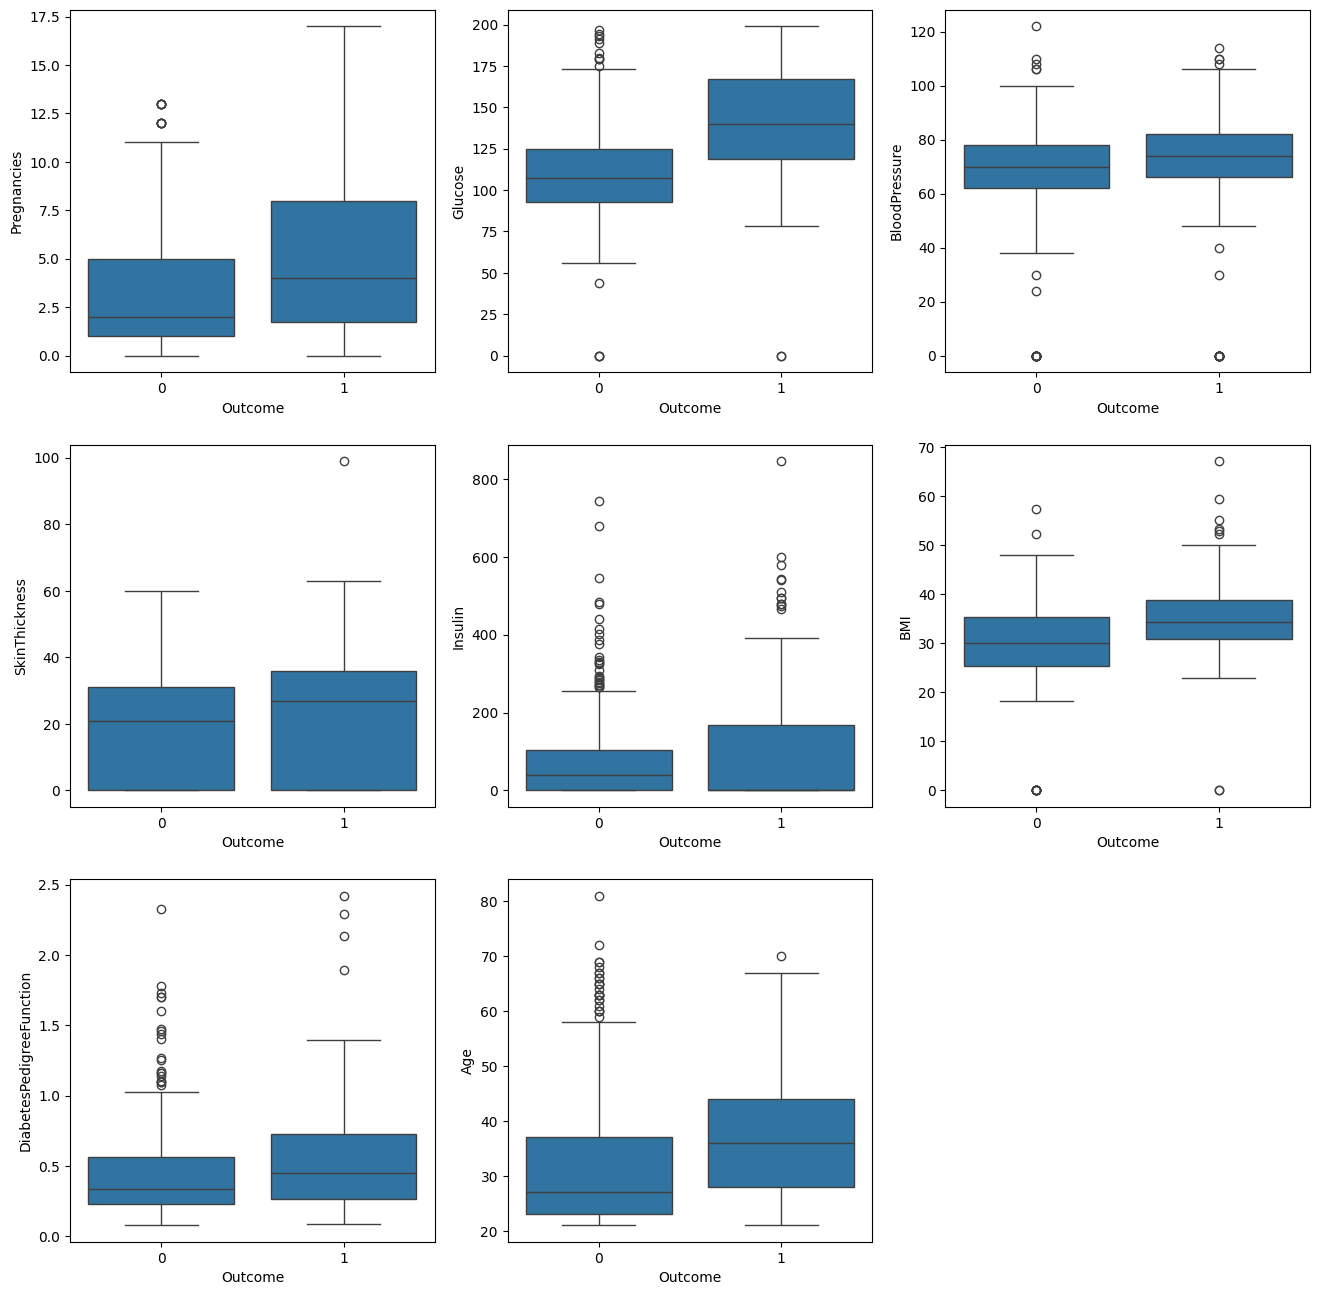

In [ ]:
col = x.columns
plt.figure(1,(16,16))
i=1
for c in col:
  plt.subplot(3,3,i)
  i+=1

  sns.barplot(data = dab,y = c,x= "Outcome")
col

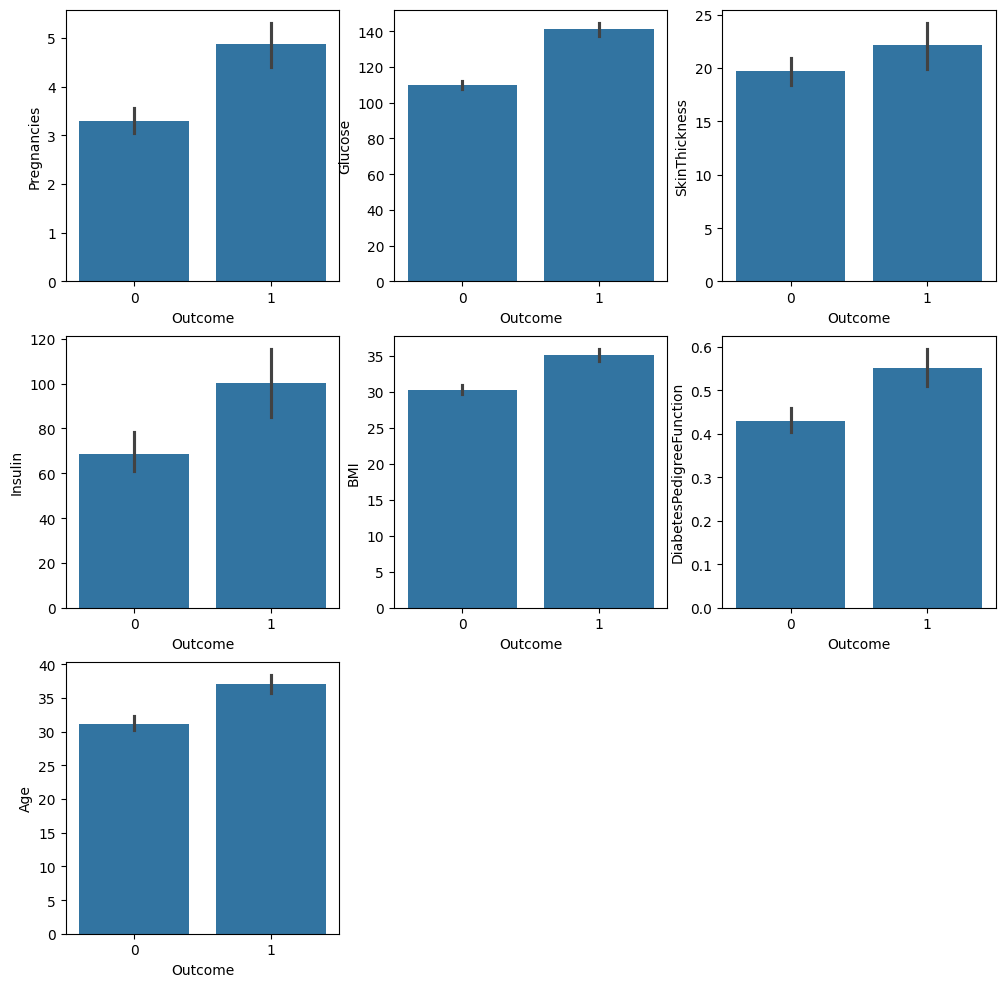

In [ ]:
x = dab.drop(["BloodPressure",'Outcome'],axis = 1,inplace = False)
plt.figure(1,(12,12))
i=1
for c in x:
  plt.subplot(3,3,i)
  i+=1

  sns.barplot(data = dab,x= "Outcome",y =c)


<Axes: xlabel='Age', ylabel='Pregnancies'>

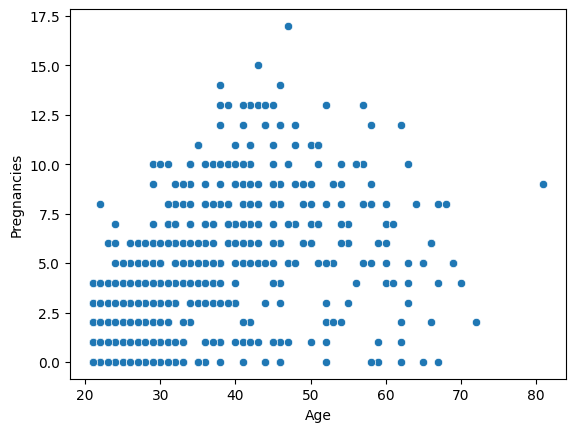

In [ ]:
x =sns.scatterplot(data = dab,y = "Pregnancies",x = "Age")

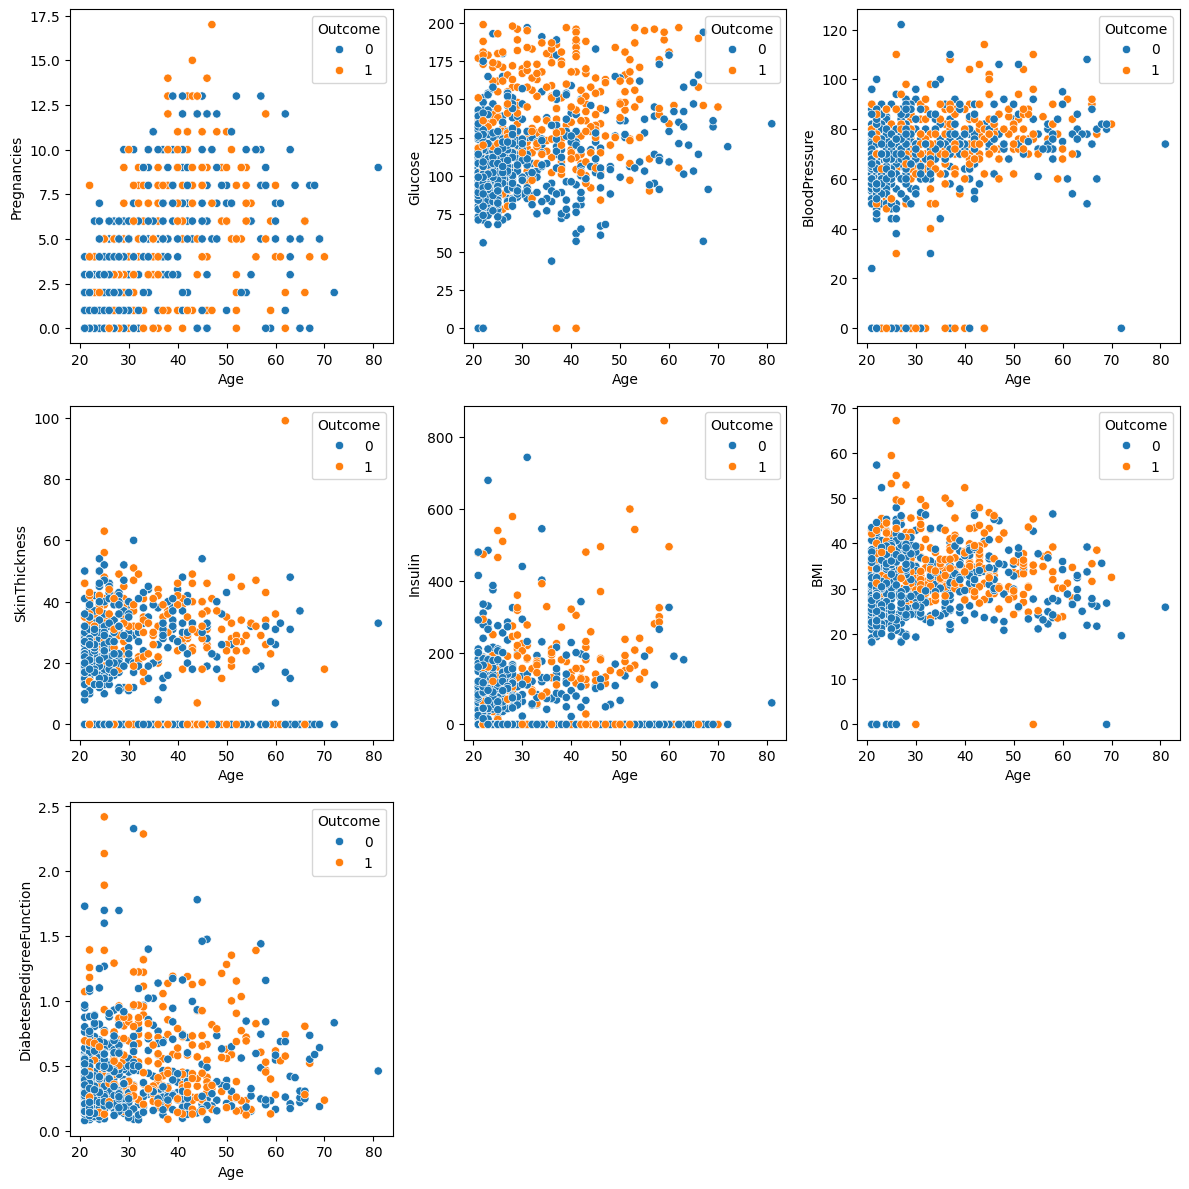

In [ ]:
x = dab.drop(["Age",'Outcome'],axis = 1,inplace = False)
plt.figure(1,(12,12))
i=1
for c in x:
  plt.subplot(3,3,i)
  i+=1

  sns.scatterplot(data = dab,x= "Age",y =c,hue="Outcome")
plt.tight_layout()

In [ ]:
dab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='AgeGroup', ylabel='Pregnancies'>

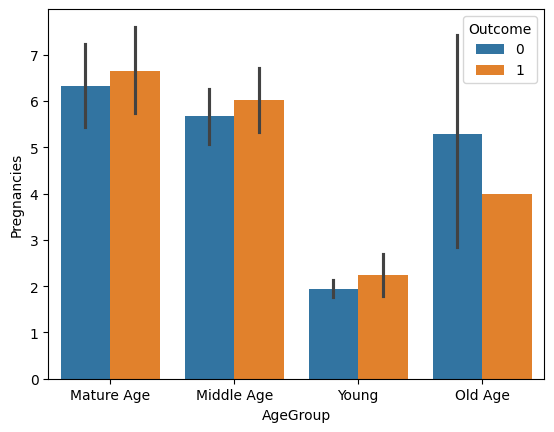

In [ ]:
dab.loc[dab['Age'] <= 30, 'AgeGroup'] = 'Young'
dab.loc[(dab['Age'] >= 31) & (dab['Age'] <= 45), 'AgeGroup'] = 'Middle Age'
dab.loc[(dab['Age']>=46)&(dab['Age']<=65),'AgeGroup'] ="Mature Age"
dab.loc[dab['Age'] > 66, 'AgeGroup'] = 'Old Age'
sns.barplot(data=dab, x='AgeGroup', y='Pregnancies',hue = "Outcome")

In [ ]:
data = dab
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,Mature Age
1,1,85,66,29,0,26.6,0.351,31,0,Middle Age
2,8,183,64,0,0,23.3,0.672,32,1,Middle Age
3,1,89,66,23,94,28.1,0.167,21,0,Young
4,0,137,40,35,168,43.1,2.288,33,1,Middle Age


In [ ]:
x = data.drop(['Outcome','AgeGroup'],axis = 1 ,inplace = False)
y = data['Outcome']
ker = ['rbf','linear',"poly"]
Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 5)
df = pd.DataFrame(np.zeros((3,3)))
df.columns = ker

df.index = [1,2,3]
for k in ker:
  for i in range(1,4):

    model = svm.SVC(kernel = k,C=i,gamma = "scale")
    model = model.fit(Xtrain,Ytrain)
    pred = model.predict(Xtest)
    acc = metrics.accuracy_score(pred,Ytest)
    df.loc[i,k] = acc

df.index = ['c1','c2','c3']



# Fish database

In [ ]:
d = pd.read_csv("Fish.csv")
d

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<Axes: title={'center': 'Accuracy'}>

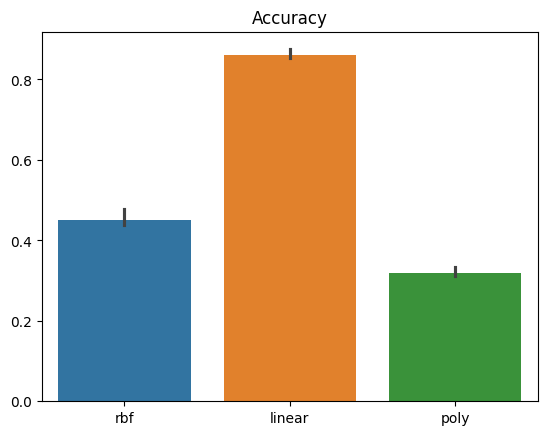

In [ ]:
x = d.drop(['Species'],axis = 1,inplace = False)

y = d['Species']
Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 5)
df = pd.DataFrame(np.zeros((3,3)))
df.columns = ker

df.index = [1,2,3]
for k in ker:
  for i in range(1,4):

    model = svm.SVC(kernel = k,C=i,gamma = "scale")
    model = model.fit(Xtrain,Ytrain)
    pred = model.predict(Xtest)
    acc = metrics.accuracy_score(pred,Ytest)
    df.loc[i,k] = acc

df.index = ['c1','c2','c3']
plt.title("Accuracy")
sns.barplot(df)



# Decision Tree on next day
